## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df = pd.read_csv("insurance.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Handling Missing Values

### 1- Identification

In [3]:
missing_values = df.isnull().sum()
missing_values

age         1
sex         2
bmi         1
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2- Imputation methods

In [4]:
# using pandas
# df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# missing_values_age = df['sex'].isnull().sum()
# missing_values_age
# df.head(10)

# using skitlearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :1])
X[:, :1] = imputer.transform(X[:, :1])
print(X[:10])

[[19.0 'female' nan 0 'yes' 'southwest']
 [18.0 'male' 33.77 1 'no' 'southeast']
 [28.0 'male' 33.0 3 'no' 'southeast']
 [39.21166791323859 'male' 22.705 0 'no' 'northwest']
 [32.0 'male' 28.88 0 'no' 'northwest']
 [31.0 nan 25.74 0 'no' 'southeast']
 [46.0 nan 33.44 1 'no' 'southeast']
 [37.0 'female' 27.74 3 'no' 'northwest']
 [37.0 'male' 29.83 2 'no' 'northeast']
 [60.0 'female' 25.84 0 'no' 'northwest']]


### 3- Deletion strategies

In [5]:
# df_cleaned_rows = df.dropna()

df_cleaned_columns = df.dropna(axis=1)
missing_values = df_cleaned_columns.isnull().sum()
missing_values

children    0
smoker      0
region      0
charges     0
dtype: int64

## Encoding Variables

### 1- Independent Variable

#### using pandas

In [6]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# df = pd.read_csv("insurance.csv")
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values


# # label encoding
# le_sex = LabelEncoder()
# df['sex'] = le_sex.fit_transform(df['sex'])

# # one hot encoding
# # df = pd.get_dummies(df, columns=['smoker'], drop_first=True)
# df = pd.get_dummies(df, columns=['region'], drop_first=True)

# df.head(10)



#### using sklearn

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


df = pd.read_csv("insurance.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# label encoding
label_encoder = LabelEncoder()

X[:, 1] = label_encoder.fit_transform(X[:, 1])
X[:, 4] = label_encoder.fit_transform(X[:, 4])



# one hot encoding
encoder = OneHotEncoder(drop='first')


column_transformer = ColumnTransformer(transformers=[('encoder', encoder, [5])],remainder='passthrough')


X = column_transformer.fit_transform(X)

print(X[:5, :]) 

[[0.0 0.0 1.0 19.0 0 nan 0 1]
 [0.0 1.0 0.0 18.0 1 33.77 1 0]
 [0.0 1.0 0.0 28.0 1 33.0 3 0]
 [1.0 0.0 0.0 nan 1 22.705 0 0]
 [1.0 0.0 0.0 32.0 1 28.88 0 0]]


### 2- Dependent Variable

## Splitting the Dataset

In [16]:
from sklearn.model_selection import train_test_split
# df = pd.read_csv("insurance.csv")
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_test)

[[1.0 0.0 0.0 ... 35.53 0 0]
 [1.0 0.0 0.0 ... 31.54 0 0]
 [0.0 0.0 1.0 ... 37.0 0 0]
 ...
 [0.0 1.0 0.0 ... 38.94 2 1]
 [1.0 0.0 0.0 ... 36.575 0 0]
 [0.0 0.0 0.0 ... 26.125 0 0]]


In [9]:
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# train_data.shape, test_data.shape, df.shape

## Feature Scaling

### 1- Normalization

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()

# X_train = min_max_scaler.fit_transform(X_train)

# X_test = min_max_scaler.transform(X_test)

# print(X_train)


### 2- Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
print(X_train)

[[ 1.76954066 -0.59822071 -0.57519194 ... -0.6649207  -0.90705771
  -0.50874702]
 [-0.56511841 -0.59822071  1.73855008 ... -1.513884   -0.07894188
  -0.50874702]
 [-0.56511841  1.67162383 -0.57519194 ...  1.08035192 -0.90705771
  -0.50874702]
 ...
 [-0.56511841 -0.59822071 -0.57519194 ...  0.69995106  0.74917395
   1.96561348]
 [-0.56511841  1.67162383 -0.57519194 ... -1.38000902  0.74917395
   1.96561348]
 [-0.56511841  1.67162383 -0.57519194 ... -0.44614939 -0.07894188
  -0.50874702]]


## Feature Selection

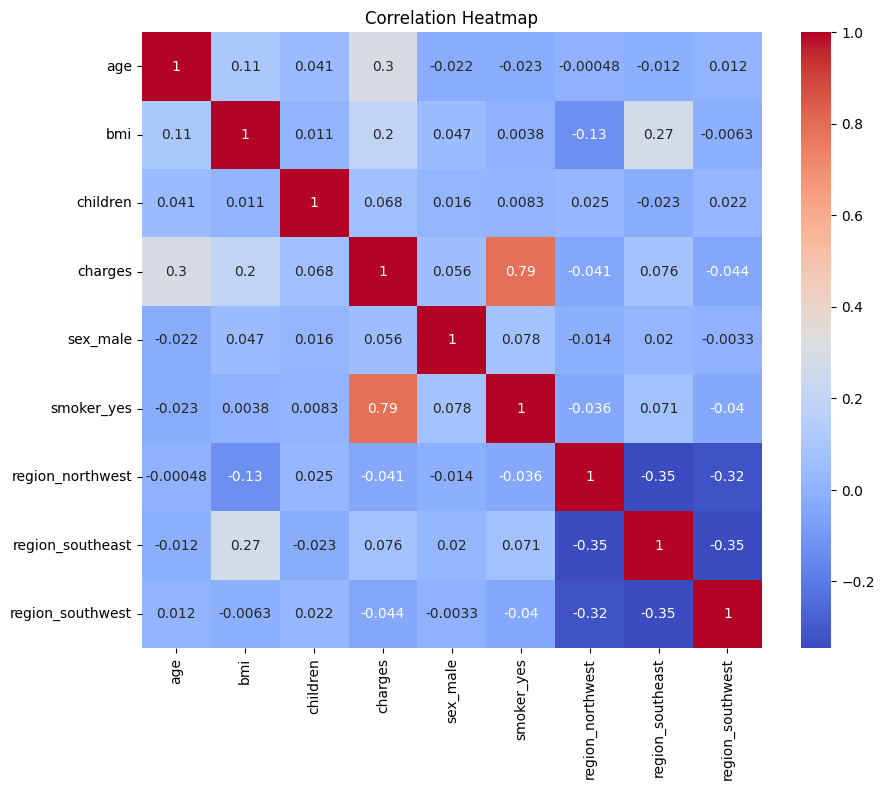

charges             1.000000
smoker_yes          0.788413
age                 0.299849
bmi                 0.199122
region_southeast    0.076129
children            0.068230
sex_male            0.056192
region_northwest   -0.041321
region_southwest   -0.043898
Name: charges, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_csv("insurance.csv")

data = data.dropna()

data = pd.get_dummies(data, drop_first=True)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

correlation_with_charges = correlation_matrix["charges"].sort_values(ascending=False)
correlation_with_charges